## 1. Import Necessary Libraries


In [3]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from mord import LogisticIT

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, exhaustive_search 
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import plotDecisionTree, classificationSummary, regressionSummary


from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# Create data frame for data set.
ev_df = pd.read_csv('team11Dataset.csv')

# Display the first 10 records of heart_disease_df data frame.
print(ev_df.head(10))

   bichoice  range  home_chg  work_chg  town  highway gender          state  \
0         0      1         3         1     3        2   Male  Massachusetts   
1         0      4         3         3     4        2   Male  Massachusetts   
2         0      2         5         0     2        4   Male  Massachusetts   
3         0      4         5         0     1        1   Male  Massachusetts   
4         0      1         5         0     1        2   Male  Massachusetts   
5         0      3        20        10     2        4   Male  Massachusetts   
6         1      3         1         1     3        2   Male  Massachusetts   
7         0      1         3         3     4        2   Male  Massachusetts   
8         0      1         3         5     4        1   Male  Massachusetts   
9         0      2         5        20     3        4   Male  Massachusetts   

   Region  education  ...  home_parking  home_evse  work_parking  work_evse  \
0       1          4  ...             3          2 

# 2.Data preprocessing

### Understanding the shape of the dataset

In [6]:
# Determine dimensions of dataframe. 
print('Dimensions of dataframe:',ev_df.shape )
# It has 1025 rows and 14 columns.

Dimensions of dataframe: (5898, 27)


In [7]:
ev_df.duplicated().sum()

0

In [8]:
ev_df.isna().sum()

bichoice        0
range           0
home_chg        0
work_chg        0
town            0
highway         0
gender          0
state           0
Region          0
education       0
employment      0
hsincome        0
hsize           0
housit          0
residence       0
all_cars        0
ev_cars         0
home_parking    0
home_evse       0
work_parking    0
work_evse       0
buycar          0
zipcode         0
dmileage        0
long_dist       0
Age_category    0
RUCA            0
dtype: int64

### Check the data types of the columns for the dataset.

In [9]:
# Display column data types in the dataframe
print('Datatypes of all the columns in the dataset')
print(ev_df.info())
ev_df.describe().T

Datatypes of all the columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bichoice      5898 non-null   int64 
 1   range         5898 non-null   int64 
 2   home_chg      5898 non-null   int64 
 3   work_chg      5898 non-null   int64 
 4   town          5898 non-null   int64 
 5   highway       5898 non-null   int64 
 6   gender        5898 non-null   object
 7   state         5898 non-null   object
 8   Region        5898 non-null   int64 
 9   education     5898 non-null   int64 
 10  employment    5898 non-null   int64 
 11  hsincome      5898 non-null   int64 
 12  hsize         5898 non-null   int64 
 13  housit        5898 non-null   int64 
 14  residence     5898 non-null   int64 
 15  all_cars      5898 non-null   int64 
 16  ev_cars       5898 non-null   int64 
 17  home_parking  5898 non-null   int64 
 18  home

count          mean           std     min      25%      50%  \
bichoice      5898.0      0.550017      0.497534     0.0      0.0      1.0   
range         5898.0      2.507460      1.112326     1.0      2.0      3.0   
home_chg      5898.0      5.943371      6.602592     0.0      1.0      3.0   
work_chg      5898.0      5.899627      6.574685     0.0      1.0      3.0   
town          5898.0      2.504408      1.124472     1.0      1.0      3.0   
highway       5898.0      2.502204      1.115089     1.0      2.0      2.0   
Region        5898.0      2.899288      1.367156     1.0      2.0      3.0   
education     5898.0      2.703967      0.839617     1.0      2.0      3.0   
employment    5898.0      1.659207      1.291301     1.0      1.0      1.0   
hsincome      5898.0      1.793489      0.886894     1.0      1.0      2.0   
hsize         5898.0      2.672431      1.314606     1.0      2.0      2.0   
housit        5898.0      1.460834      0.620362     1.0      1.0      1.0   
residence     5898.0      2.031536      1.717753     1.0      1.0      1.0   
all_cars      5898.0      1.582909      0.719641     1.0      1.0      1.0   
ev_cars       5898.0      0.078332      0.297468     0.0      0.0      0.0   
home_parking  5898.0      3.323499      1.865167     1.0      1.0      3.0   
home_evse     5898.0      1.835198      0.445773     1.0      2.0      2.0   
work_parking  5898.0      2.654120      1.400017     1.0      2.0      2.0   
work_evse     5898.0      1.962360      0.608242     1.0      2.0      2.0   
buycar        5898.0      1.777213      0.854842     1.0      1.0      1.0   
zipcode       5898.0  52330.798576  29095.128072  1247.0  29483.0  48073.0   
dmileage      5898.0     24.750763     20.347513     0.0     10.0     20.0   
long_dist     5898.0      1.486267      1.316556     0.0      0.0      1.0   
Age_category  5898.0      1.949135      0.867394     1.0      1.0      2.0   
RUCA          5898.0      1.214649      0.586181     1.0      1.0      1.0   

                  75%      max  
bichoice          1.0      1.0  
range             3.0      4.0  
home_chg         10.0     20.0  
work_chg         10.0     20.0  
town              4.0      4.0  
highway           3.0      4.0  
Region            4.0      5.0  
education         3.0      4.0  
employment        2.0      6.0  
hsincome          2.0      5.0  
hsize             4.0      5.0  
housit            2.0      4.0  
residence         2.0      8.0  
all_cars          2.0      4.0  
ev_cars           0.0      4.0  
home_parking      5.0      6.0  
home_evse         2.0      3.0  
work_parking      4.0      6.0  
work_evse         2.0      3.0  
buycar            3.0      3.0  
zipcode       78258.0  99703.0  
dmileage         30.0    100.0  
long_dist         2.0      4.0  
Age_category      2.0      4.0  
RUCA              1.0      4.0

- There are no null values
- All columns are integer type except state which is of object datatype
- Some of the attributes need the conversion into their equivalent dummy values

In [10]:
# Display column data types in the dataframe before modification
print('Original Column data types')
print(ev_df.dtypes)

Original Column data types
bichoice         int64
range            int64
home_chg         int64
work_chg         int64
town             int64
highway          int64
gender          object
state           object
Region           int64
education        int64
employment       int64
hsincome         int64
hsize            int64
housit           int64
residence        int64
all_cars         int64
ev_cars          int64
home_parking     int64
home_evse        int64
work_parking     int64
work_evse        int64
buycar           int64
zipcode          int64
dmileage         int64
long_dist        int64
Age_category     int64
RUCA             int64
dtype: object


In [11]:
# Need to change all the variables with multiple classes to 'category'datatype 
ev_df.gender = ev_df.gender.astype('category')
ev_df.state = ev_df.state.astype('category')
ev_df.employment = ev_df.employment.astype('category')
ev_df.hsize = ev_df.hsize.astype('category')
ev_df.housit = ev_df.housit.astype('category')
ev_df.residence = ev_df.residence.astype('category')
#ev_df.zipcode = ev_df.zipcode.astype('category')
ev_df.buycar = ev_df.buycar.astype('category')
ev_df.home_evse = ev_df.home_evse.astype('category')
ev_df.work_evse = ev_df.work_evse.astype('category')
ev_df.town = ev_df.town.astype('category')
ev_df.highway = ev_df.highway.astype('category')
ev_df.home_parking = ev_df.home_parking.astype('category')
ev_df.work_parking = ev_df.work_parking.astype('category')
ev_df.RUCA = ev_df.RUCA.astype('category')
ev_df.Region = ev_df.Region.astype('category')
ev_df.Age_category = ev_df.Age_category.astype('category')
ev_df.education = ev_df.education.astype('category')
ev_df.hsincome = ev_df.hsincome.astype('category')
ev_df.range = ev_df.range.astype('category')
ev_df.bichoice = ev_df.bichoice.astype('category')

# Display category levels (attributes) and category type.
print(' ')
print('Category levels and changed variable type:')
print(ev_df.gender.cat.categories)
print(ev_df.gender.dtype)
print(ev_df.state.cat.categories)
print(ev_df.state.dtype)
print(ev_df.employment.cat.categories)
print(ev_df.employment.dtype)
print(ev_df.hsize.cat.categories)
print(ev_df.hsize.dtype)
print(ev_df.housit.cat.categories)
print(ev_df.housit.dtype)
print(ev_df.residence.cat.categories)
print(ev_df.residence.dtype)
print(ev_df.bichoice.cat.categories)
print(ev_df.bichoice.dtype)
# print(ev_df.zipcode.cat.categories)
# print(ev_df.zipcode.dtype)
print(ev_df.buycar.cat.categories)
print(ev_df.buycar.dtype)
print(ev_df.home_evse.cat.categories)
print(ev_df.home_evse.dtype)
print(ev_df.work_evse.cat.categories)
print(ev_df.work_evse.dtype)
print(ev_df.town.cat.categories)
print(ev_df.town.dtype)
print(ev_df.highway.cat.categories)
print(ev_df.highway.dtype)
print(ev_df.home_parking.cat.categories)
print(ev_df.home_parking.dtype)
print(ev_df.work_parking.cat.categories)
print(ev_df.work_parking.dtype)
print(ev_df.RUCA.cat.categories)
print(ev_df.RUCA.dtype)
print(ev_df.Region.cat.categories)
print(ev_df.Region.dtype)
print(ev_df.Age_category.cat.categories)
print(ev_df.Age_category.dtype)
print(ev_df.education.cat.categories)
print(ev_df.education.dtype)
print(ev_df.hsincome.cat.categories)
print(ev_df.hsincome.dtype)
print(ev_df.range.cat.categories)
print(ev_df.range.dtype)
print(ev_df.bichoice.cat.categories)
print(ev_df.bichoice.dtype)

 
Category levels and changed variable type:
Index(['Female', 'Male'], dtype='object')
category
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object')
category
Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5], dtype='int64')
category
Int64Index([1, 2, 3, 4], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5, 6, 8], dtype=

In [12]:
ordinal_encoded_columns= ['state']

ordinal_encoder = OrdinalEncoder(categories='auto')
ordinal_encoded_data = ordinal_encoder.fit_transform(ev_df[ordinal_encoded_columns])

#Convert it to df
ordinal_encoded_data_df = pd.DataFrame(ordinal_encoded_data, index=ev_df.index,columns=['state'])
#ordinal_encoded_data_df.columns = ordinal_encoder.get_feature_names_out(input_features=ev_df[ordinal_encoded_columns])

#Extract only the columns that didnt need to be encoded
data_other_cols = ev_df.drop(columns=ordinal_encoded_columns)

#Concatenate the two dataframes : 
ev_df = pd.concat([ordinal_encoded_data_df, data_other_cols], axis=1)
print(ev_df)
ev_df.shape

      state bichoice range  home_chg  work_chg town highway gender Region  \
0      20.0        0     1         3         1    3       2   Male      1   
1      20.0        0     4         3         3    4       2   Male      1   
2      20.0        0     2         5         0    2       4   Male      1   
3      20.0        0     4         5         0    1       1   Male      1   
4      20.0        0     1         5         0    1       2   Male      1   
...     ...      ...   ...       ...       ...  ...     ...    ...    ...   
5893    1.0        0     2        10         5    2       2   Male      5   
5894    1.0        1     3         1         3    4       3   Male      5   
5895    1.0        0     1        20         2    2       4   Male      5   
5896    1.0        0     2        20         5    4       2   Male      5   
5897    1.0        0     1         2         1    3       1   Male      5   

     education  ... home_parking home_evse work_parking work_evse buycar  \

(5898, 27)

In [13]:
# Display column data types in the dataframe after modification
print('Modified Column data types')
print(ev_df.dtypes)

Modified Column data types
state            float64
bichoice        category
range           category
home_chg           int64
work_chg           int64
town            category
highway         category
gender          category
Region          category
education       category
employment      category
hsincome        category
hsize           category
housit          category
residence       category
all_cars           int64
ev_cars            int64
home_parking    category
home_evse       category
work_parking    category
work_evse       category
buycar          category
zipcode            int64
dmileage           int64
long_dist          int64
Age_category    category
RUCA            category
dtype: object


In [14]:
ev_df.state = ev_df.state.astype('category')

In [15]:
print(ev_df.dtypes)

state           category
bichoice        category
range           category
home_chg           int64
work_chg           int64
town            category
highway         category
gender          category
Region          category
education       category
employment      category
hsincome        category
hsize           category
housit          category
residence       category
all_cars           int64
ev_cars            int64
home_parking    category
home_evse       category
work_parking    category
work_evse       category
buycar          category
zipcode            int64
dmileage           int64
long_dist          int64
Age_category    category
RUCA            category
dtype: object


## 3. Exploratory Data Analysis

In [16]:
import plotly.graph_objs as go


# Load the data
data = pd.read_csv('team11Dataset.csv')

# Create a dictionary mapping state names to state codes
state_codes = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
               'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
               'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
               'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
               'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
               'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
               'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
               'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
               'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK','Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
               'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
               'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

# Add a new column with the state codes
data['state_code'] = data['state'].map(state_codes)

state_data = data.groupby('state_code')['bichoice'].sum().reset_index()


# get state names and car interest counts as lists
state_names = state_data['state_code'].tolist()
car_interest_counts = state_data['bichoice'].tolist()

# create choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=state_names,
    z=car_interest_counts,
    locationmode='USA-states',
    colorscale='YlOrRd',
    colorbar_title="Number of Individuals<br>Interested to Buy Cars",
    marker_line_color='white',
    text=state_names
))

# set layout options
fig.update_layout(
    title_text='Individuals Interested to Buy EV Cars by State',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=False,
        lakecolor='rgb(255, 255, 255)'),
)

# show the map
fig.show()

In [17]:
#What Percentage Of people buy an EV ?
EV_count = ev_df['bichoice'].value_counts() 
EV_count

1    3244
0    2654
Name: bichoice, dtype: int64

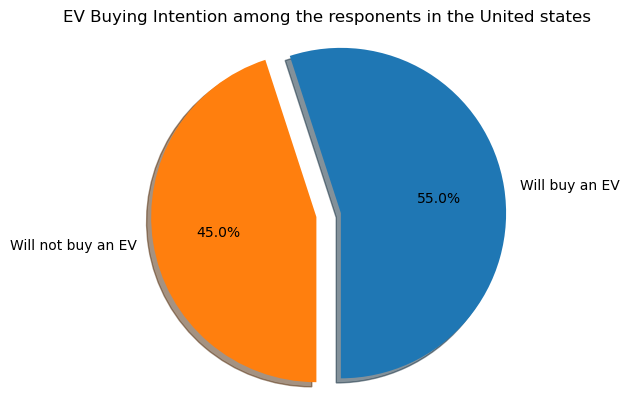

In [18]:
labels = ['Will buy an EV', 'Will not buy an EV']
slices = [3244, 2654]
explode = [0, 0.15]
# plotting in a pie chart
plt.pie(slices, labels =labels, explode = explode, shadow = True, startangle = 270, autopct='%1.1f%%')
plt.axis('equal')
plt.title("EV Buying Intention among the responents in the United states");

In [19]:
#updated
# percentage of buying intention
EV_Intention_count = ev_df['bichoice'].value_counts(normalize = True) * 100
EV_Intention_count

1    55.001695
0    44.998305
Name: bichoice, dtype: float64

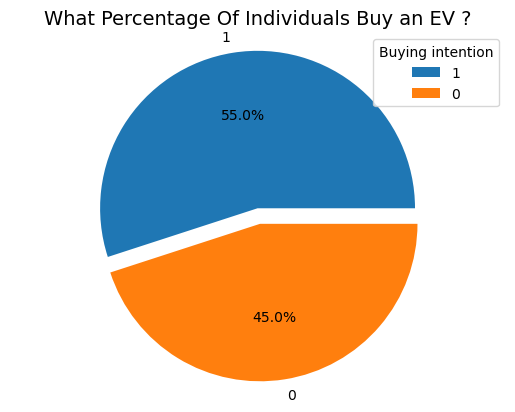

In [20]:
# plot the above count
EV_Intention_count.plot(kind = 'pie',autopct='%1.1f%%',explode = [0.1,0], startangle = 0)
plt.axis('equal')
plt.ylabel("")
plt.legend(title = 'Buying intention')
plt.title('What Percentage Of Individuals Buy an EV ?', fontdict= {'fontsize':14});

In [21]:
#updated
# percentage of each gender who have intention buy an EV
gender_per = ev_df.groupby('gender')['bichoice'].value_counts(normalize = True) 
gender_per

gender   
Female  1    0.584848
        0    0.415152
Male    1    0.514686
        0    0.485314
Name: bichoice, dtype: float64

In [22]:
#Resetting the above groupby to a dataframe
gender_per = gender_per.reset_index(name = 'percentage')
gender_per

gender level_1  percentage
0  Female       1    0.584848
1  Female       0    0.415152
2    Male       1    0.514686
3    Male       0    0.485314

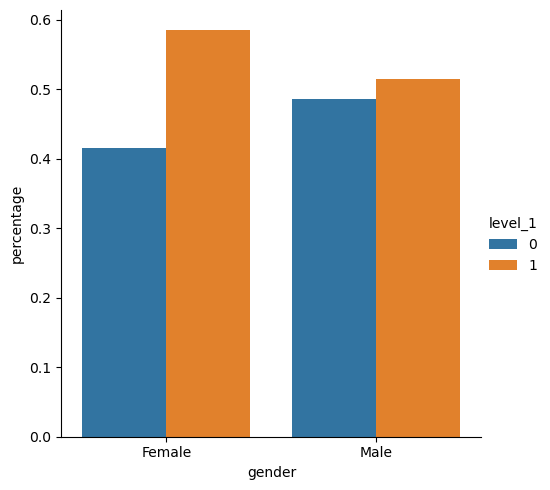

In [23]:
#Visualize the gender no show results
sns.catplot(data = gender_per, x = 'gender', y = 'percentage', hue = 'level_1', kind = 'bar');

In [24]:
#updated
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(z) # length of the column
    plt.figure(figsize=(5,5))
    ax = sns.countplot(z,palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

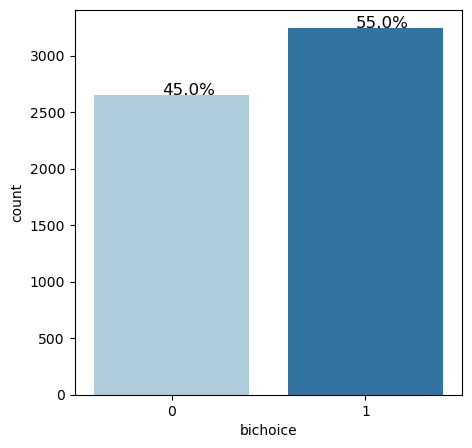

In [25]:
perc_on_bar(ev_df['bichoice'])

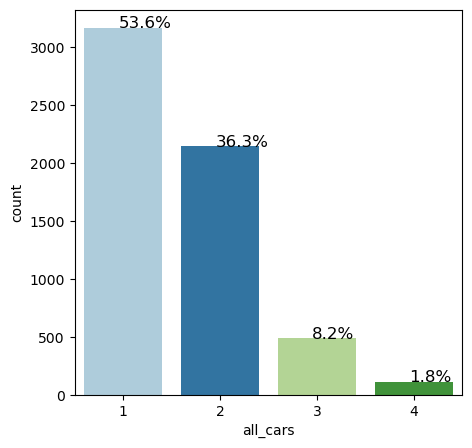

In [26]:
perc_on_bar(ev_df['all_cars'])

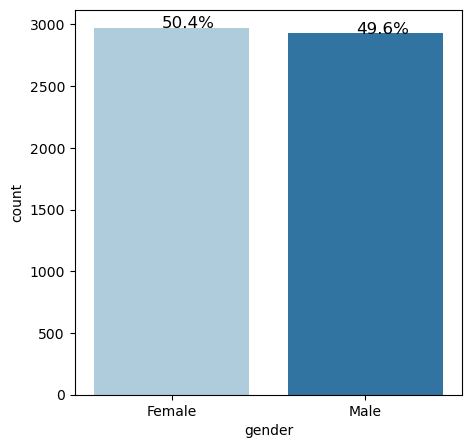

In [27]:
perc_on_bar(ev_df['gender'])

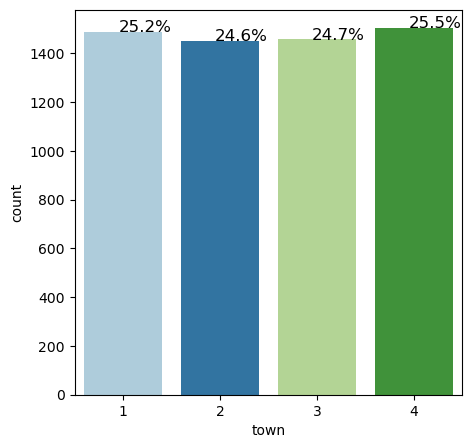

In [28]:
perc_on_bar(ev_df['town'])

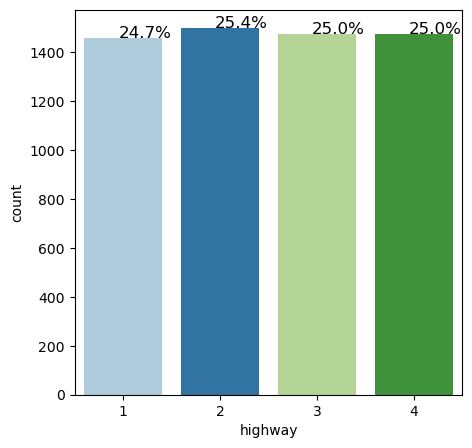

In [29]:
perc_on_bar(ev_df['highway'])

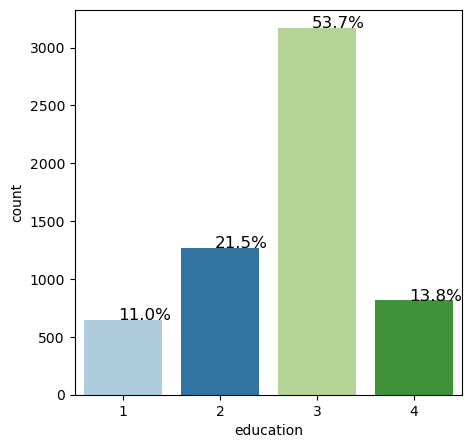

In [30]:
perc_on_bar(ev_df['education'])

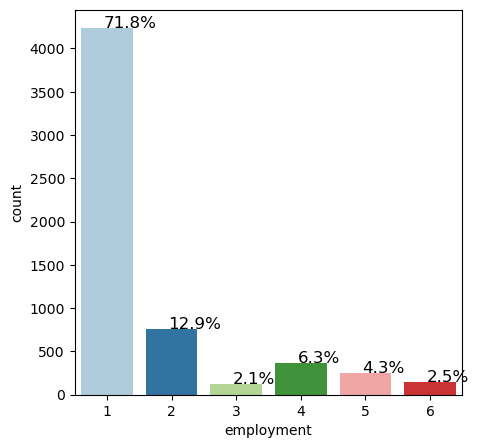

In [31]:
perc_on_bar(ev_df['employment'])

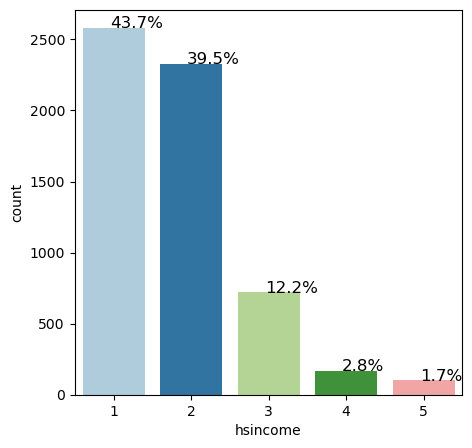

In [32]:
perc_on_bar(ev_df['hsincome'])

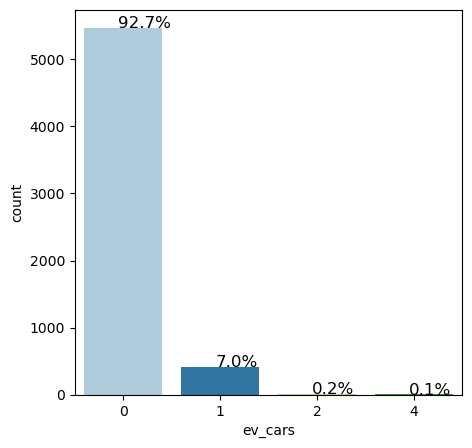

In [33]:
perc_on_bar(ev_df['ev_cars'])

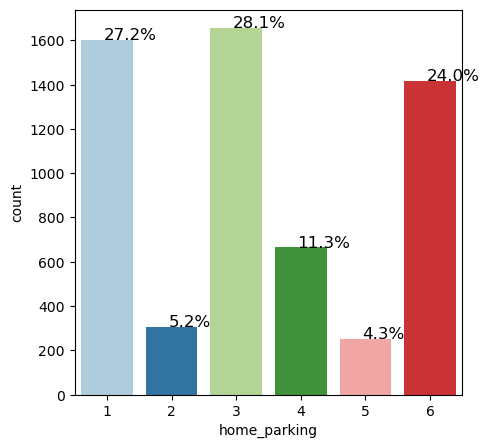

In [34]:
perc_on_bar(ev_df['home_parking'])

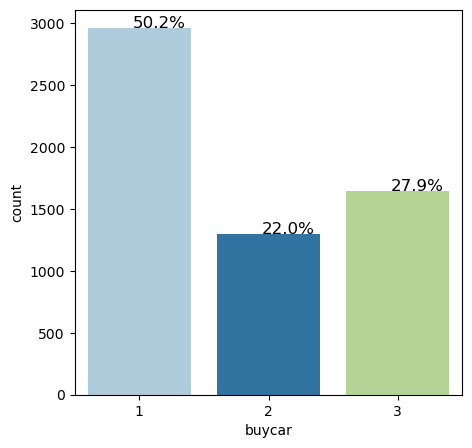

In [35]:
perc_on_bar(ev_df['buycar'])

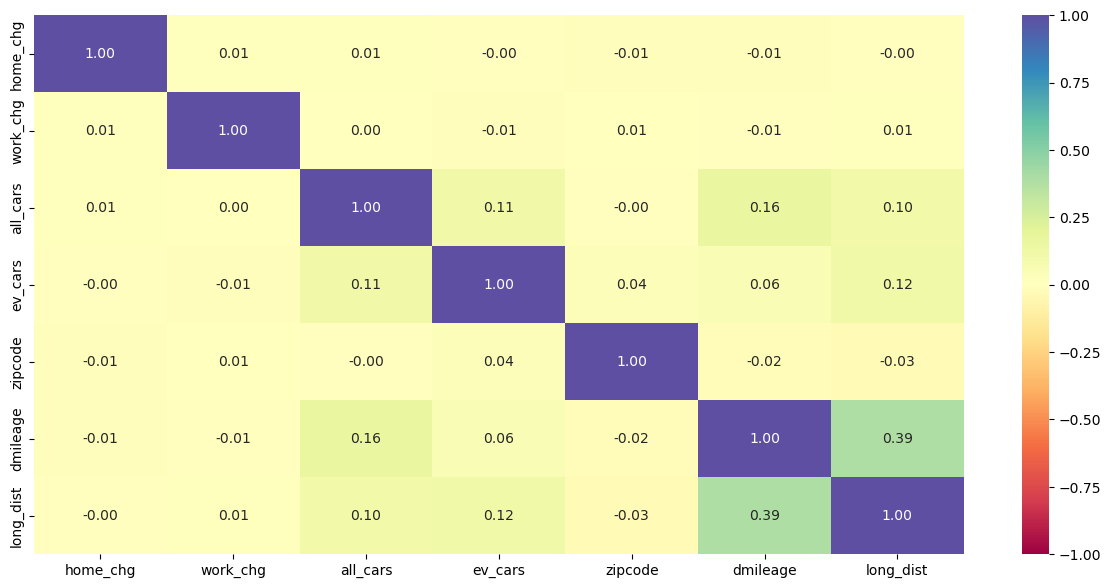

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(ev_df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

# Research Questions

### Q1 How does householders’ residence area classification (city/suburb/rural) influence their electric vehicle purchase decision? *

In [37]:
#updated
# Load the data into a pandas DataFrame
data = pd.read_csv('team11Dataset.csv')

# Group the data by residence area classification and calculate the average purchase decision for each group
grouped_data = data.groupby('RUCA')['bichoice'].value_counts(normalize = False) 
grouped_data = grouped_data.reset_index(name = 'count')
# Print the results
print(grouped_data)

   RUCA  bichoice  count
0     1         1   2818
1     1         0   2246
2     2         1    250
3     2         0    236
4     3         1    142
5     3         0    122
6     4         0     50
7     4         1     34


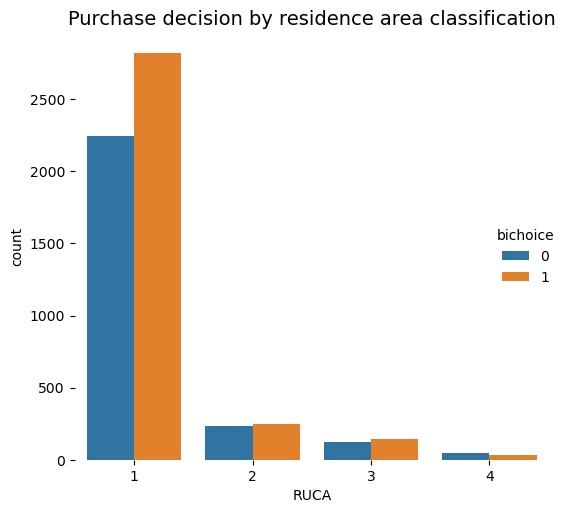

In [38]:
sns.catplot(data = grouped_data, x = 'RUCA', y = 'count', hue = 'bichoice', kind = 'bar');
plt.box(on=None)
plt.tight_layout()
plt.title('Purchase decision by residence area classification', fontdict= {'fontsize':14})
plt.show()

### Q2 Does having a charging point at work option influence a household’s decision to purchase EV?

In [39]:
#updated
# Load the data into a pandas DataFrame
data = pd.read_csv('team11Dataset.csv')

# Group the data by residence area classification and calculate the average purchase decision for each group
grouped_data = data.groupby('work_evse')['bichoice'].value_counts(normalize = False) 
grouped_data = grouped_data.reset_index(name = 'count')
# Print the results
print(grouped_data)

   work_evse  bichoice  count
0          1         1    765
1          1         0    441
2          2         1   1929
3          2         0   1779
4          3         1    550
5          3         0    434


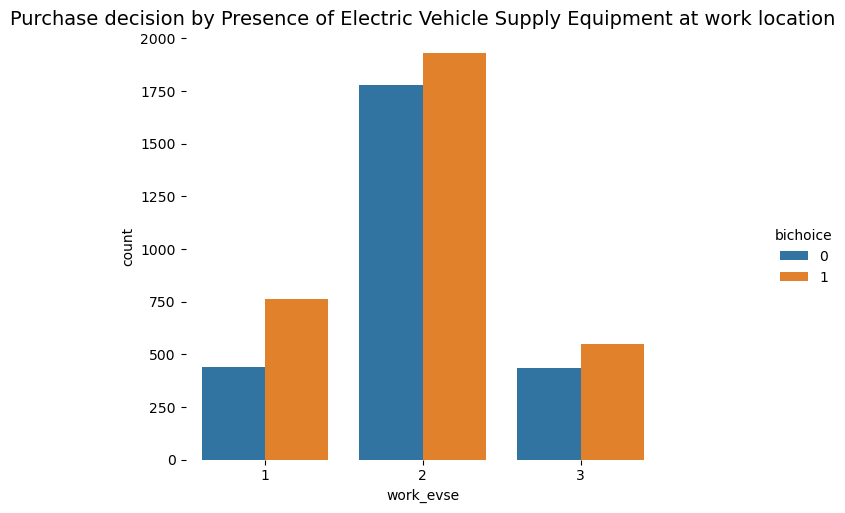

In [40]:
sns.catplot(data = grouped_data, x = 'work_evse', y = 'count', hue = 'bichoice', kind = 'bar');
plt.box(on=None)
plt.tight_layout()
plt.title('Purchase decision by Presence of Electric Vehicle Supply Equipment at work location', fontdict= {'fontsize':14})
plt.show()

### Q3 Do individuals who have an electric outlet facility at their home parking space show more interest to buy an electric vehicle? 

In [41]:
#change axis name -rework 
# Load the data into a pandas DataFrame
data = pd.read_csv('team11Dataset.csv')

# Group the data by residence area classification and calculate the count purchase decision for each group
grouped_data1 = data.groupby('home_evse')['bichoice'].value_counts(normalize = False) 
grouped_data1 = grouped_data1.reset_index(name = 'count')
# Print the results
print(grouped_data1)

   home_evse  bichoice  count
0          1         1    631
1          1         0    521
2          2         1   2493
3          2         0   2073
4          3         1    120
5          3         0     60


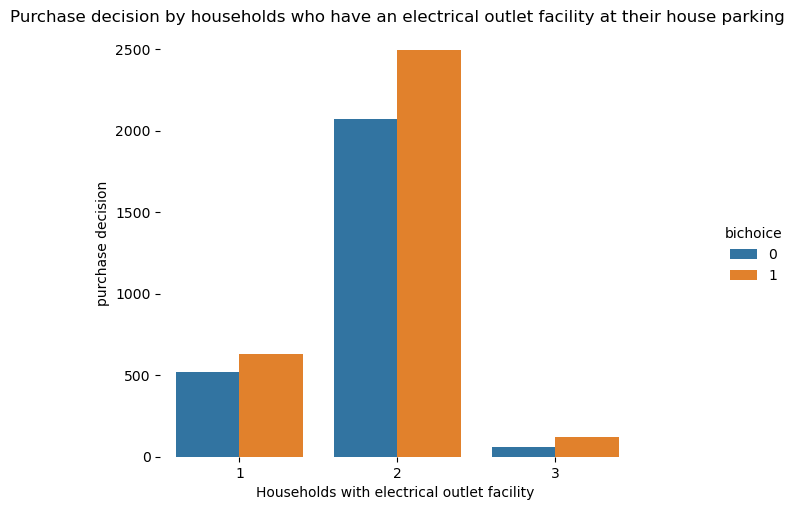

In [42]:
# Plot the results in a bar chart
sns.catplot(data = grouped_data1, x = 'home_evse', y = 'count', hue = 'bichoice', kind = 'bar');
plt.box(on=None)
plt.tight_layout()
plt.xlabel('Households with electrical outlet facility ')
plt.ylabel('purchase decision')
plt.title('Purchase decision by households who have an electrical outlet facility at their house parking')
plt.show()

### Q4 Which states in the U.S. have the highest number of households expressing interest to purchase an electric car in the next three years?

In [43]:
#rework-pls updated y axis with number /counts
# Group the data by state and count the number of households expressing interest to purchase
grouped_data = data[data['bichoice'] == 1].groupby('state')['bichoice'].count()

# Sort the data by the count in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Print the top 10 states with the highest number of households expressing interest to purchase
print(sorted_data.head(10))

state
Florida           306
California        291
Texas             234
Pennsylvania      200
Washington        175
North Carolina    145
Illinois          133
Michigan          124
Ohio              104
Arizona            99
Name: bichoice, dtype: int64


In [44]:
# Sort the data by the count in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Create a list of colors for each state
colors = plt.cm.get_cmap('Set3', len(sorted_data))

# Create a stacked bar plot of the data
plt.figure(figsize=(150,70))#change border size
for i, (state, count) in enumerate(sorted_data.items()):
    plt.bar(state, count, color=colors(i), width=0.8)
    plt.text(state, count + 100, str(count), ha='center', fontsize=60)
plt.xlabel('State', fontsize=100)
plt.xticks(rotation=90, fontsize=60)
plt.ylabel('Number of households expressing interest to purchase', fontsize=100)
plt.legend()
plt.title('Number of households expressing interest to purchase by state', fontsize=100)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### Q5 Does annual income impact a household’s choice of purchasing an electric vehicle?

In [45]:
#add labels to income range x axis -legend -rework
# Group the data by income range and count the number of households expressing interest to purchase
grouped_data = data.groupby('hsincome')['bichoice'].count()


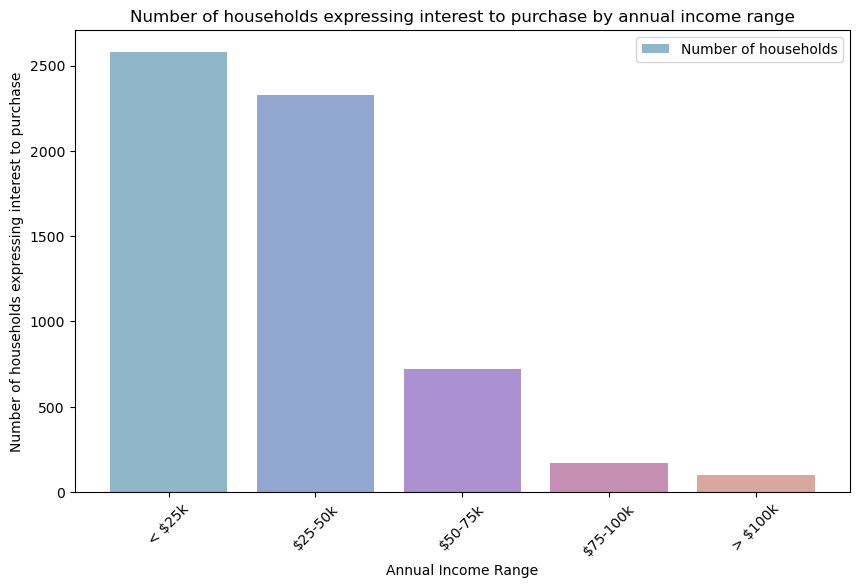

In [46]:
plt.figure(figsize=(10, 6))

# Define the colors for the bars
colors = ['#8FB7C9', '#91A7D0', '#AC91D0', '#C590B3', '#D8A79D']

# Create the bar chart with the specified colors
plt.bar(grouped_data.index, grouped_data.values, color=colors, label='Number of households')

plt.xlabel('Annual Income Range')
plt.ylabel('Number of households expressing interest to purchase')
plt.title('Number of households expressing interest to purchase by annual income range')
plt.xticks(grouped_data.index, ['< $25k', '$25-50k', '$50-75k', '$75-100k', '> $100k'], rotation=45)

plt.legend()
plt.show()

### Q6 Do students prefer to buy electric vehicles when compared to others? 

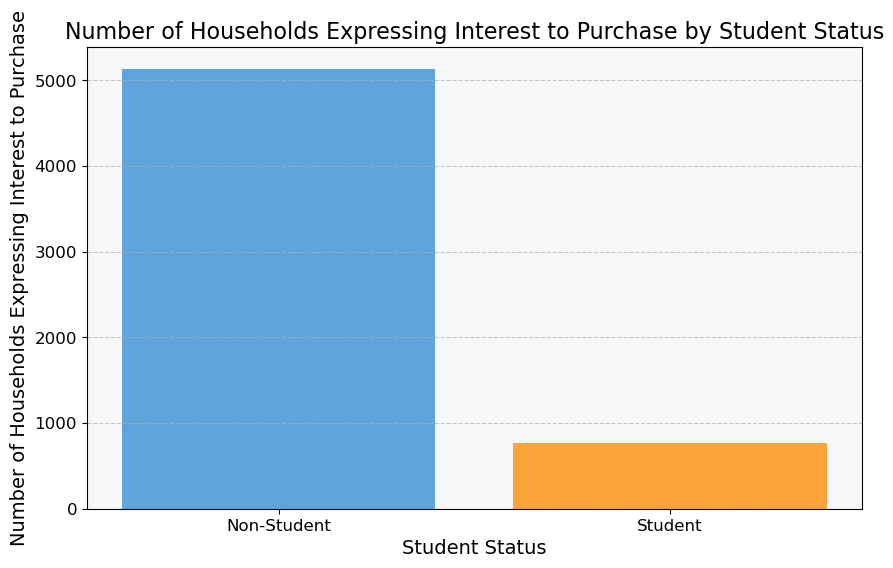

In [47]:
data = pd.read_csv('team11Dataset.csv')
#rework change colour and enhance the look
# Filter the data to select only the rows where the interested_to_purchase column is 'Yes'
#data = data['bichoice']

# Filter the data to select only the rows where the employment column is '2' (student)
student_data = data[data['employment'] == 2]

# Count the number of households expressing interest to purchase for students and non-students
student_count = student_data['bichoice'].count()
non_student_count = data[data['employment'] != 2]['bichoice'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Non-Student', 'Student'], [non_student_count, student_count], color=['#5DA5DA', '#FAA43A'])

# Set axis labels and title
plt.xlabel('Student Status', fontsize=14)
plt.ylabel('Number of Households Expressing Interest to Purchase', fontsize=14)
plt.title('Number of Households Expressing Interest to Purchase by Student Status', fontsize=16)

# Set font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set background color
plt.gca().set_facecolor('#F7F7F7')

# Show the plot
plt.show()

# Charging infrastructure

### Q7 How does having an off-street/at home parking option influence a householder’s EV purchasing decision ?

In [48]:
#add. colurs/labels,axis,legend,title,add box outsisde the chart- rework
# Load the dataset from a CSV file
df = pd.read_csv('team11Dataset.csv')

# Filter the dataset to only include rows where the home has off-street parking
df_with_parking = df[(df['home_parking'] == 1) | (df['home_parking'] == 2)]

# Calculate the percentage of households in each purchasing decision category
purchase_percentages = df_with_parking['bichoice'].value_counts(normalize=True) * 100

# Print the results
print(purchase_percentages)

1    54.507338
0    45.492662
Name: bichoice, dtype: float64


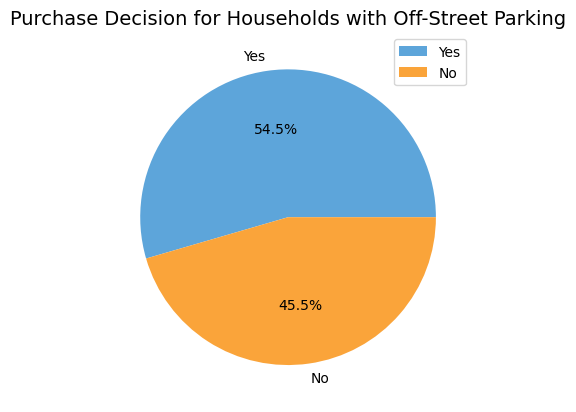

In [49]:
# Set colors for the slices
colors = ['#5DA5DA', '#FAA43A']

# Create the pie chart
plt.pie(purchase_percentages, labels=['Yes', 'No'], colors=colors, autopct='%1.1f%%')

# Set the title and legend
plt.title('Purchase Decision for Households with Off-Street Parking', fontsize=14)
plt.legend(loc='upper right')

# Add a box outside the chart
#rect = plt.Rectangle((-0.015, -0.015), -1, -1, linewidth=1, edgecolor='gray', facecolor='none')
#plt.gca().add_patch(rect)

# Show the plot
plt.show()

# Vehicle usage

### Q8 How does the extent of long distance trips taken affect a householder’s decision to purchase an electric vehicle?

In [50]:
#refer the question q1&q2 check the values displayed-rework -
# Load the dataset
dataset = pd.read_csv("team11Dataset.csv")

# Map the distance values to miles
#dataset['long_dist'] = dataset['long_dist'].map({1: 100, 2: 200, 3: 300, 4: 400})

# Calculate the percentage of households who made a purchase for each distance range
distance_purchase = dataset.groupby('long_dist')['bichoice'].sum()
# print(distance_purchase)
# print(dataset['long_dist'].unique())
distance_no_purchase = dataset.groupby('long_dist')['bichoice'].count() - distance_purchase
distance_purchase_percentage = distance_purchase / (distance_purchase + distance_no_purchase) * 100

# Print the results
print("Percentage of households who made a purchase for each distance range:")
print(distance_purchase_percentage)

Percentage of households who made a purchase for each distance range:
long_dist
0    50.880282
1    60.750636
2    56.465517
3    51.372549
4    51.944444
Name: bichoice, dtype: float64


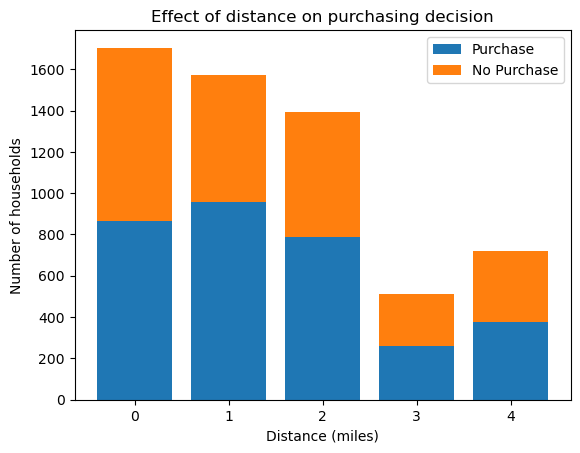

In [51]:
# Plot the stacked bar plot
plt.bar(distance_purchase.index, distance_purchase, label="Purchase")
plt.bar(distance_no_purchase.index, distance_no_purchase, bottom=distance_purchase, label="No Purchase")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of households")
plt.title("Effect of distance on purchasing decision")
plt.legend()
plt.show()

### Q9 Does a household’s daily average driving distance impact their choice of buying an EV?

In [52]:
#change colurs and other stuffs- rework
# Group the households by their daily driving distance range and purchasing column
grouped_dataset = dataset.groupby([pd.cut(dataset['dmileage'], bins=[0, 10, 20, 30, 40, 50, 60]), 'bichoice'])

# Count the number of households in each group
grouped_counts = grouped_dataset.size()

# Calculate the percentage of households who made a purchase for each daily driving distance range
driving_distance_purchase = grouped_counts.unstack()[1] / (grouped_counts.unstack()[0] + grouped_counts.unstack()[1]) * 100

# Print the results
print(driving_distance_purchase)

dmileage
(0, 10]     51.704545
(10, 20]    57.322404
(20, 30]    57.375479
(30, 40]    60.714286
(40, 50]    51.075269
(50, 60]    54.901961
dtype: float64


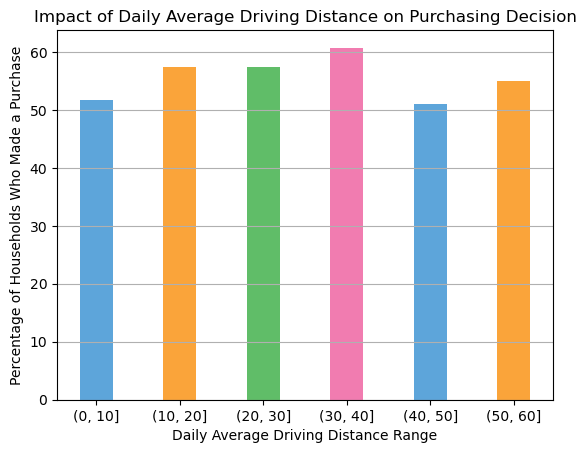

In [53]:
#Add stacked bar chart

# Set the colors for the bars
colors = ['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0']

# Create the bar chart
plt.bar(driving_distance_purchase.index.astype(str), driving_distance_purchase.values, color=colors, width=0.4)

# Add x and y axis labels
plt.xlabel("Daily Average Driving Distance Range")
plt.ylabel("Percentage of Households Who Made a Purchase")

# Add a title
plt.title("Impact of Daily Average Driving Distance on Purchasing Decision")

# Add a horizontal grid
plt.grid(axis='y')

# Show the plot
plt.show()

### Q10 Does a household already owning an electric vehicle prefer to buy another EV?

In [54]:
# Group the households by their electric vehicle ownership and purchasing column
grouped_dataset = dataset.groupby(['ev_cars', 'bichoice'])

# Count the number of households in each group
grouped_counts = grouped_dataset.size()

# Calculate the percentage of households who made a purchase for each electric vehicle ownership status
electric_vehicle_purchase = grouped_counts.unstack()[1] / (grouped_counts.unstack()[0] + grouped_counts.unstack()[1]) * 100

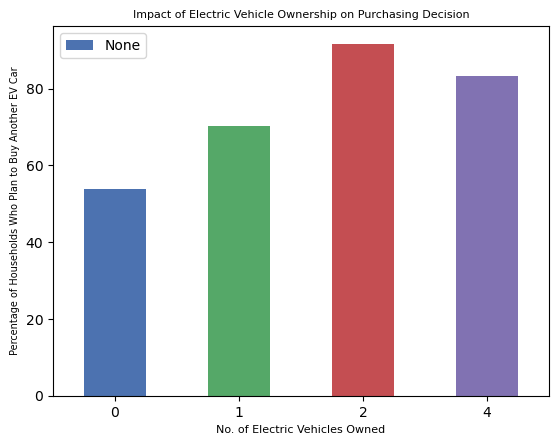

In [55]:
#Rework-Change legends

# Define custom colors
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd']

# Plot a bar chart of the results
electric_vehicle_purchase.plot(kind='bar', rot=0, color=colors)
plt.xlabel("No. of Electric Vehicles Owned", fontsize=8)
plt.ylabel("Percentage of Households Who Plan to Buy Another EV Car", fontsize=7)
plt.title("Impact of Electric Vehicle Ownership on Purchasing Decision", fontsize=8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc='upper left')
plt.show()

### Q11 Do households currently owning a fuel vehicle show higher interest in purchasing an EV as a next car?

In [56]:
# Load the dataset
dataset = pd.read_csv("team11Dataset.csv")

# Subtract ev_cars from all_cars to get fuel_cars
dataset['Fuel_Cars'] = dataset['all_cars'] - dataset['ev_cars']

# Filter the households that currently own any number of fuel vehicles
fuel_vehicles_owned = dataset[dataset['Fuel_Cars'] > 0]

# Group the households by their interest in purchasing an EV as a second car
grouped_dataset = fuel_vehicles_owned.groupby('bichoice')

# Count the number of households in each group
grouped_counts = grouped_dataset.size()

# Calculate the percentage of households in each group
ev_interest = grouped_counts / grouped_counts.sum() * 100

# Print the results
print("Percentage of households interested in purchasing an EV as their next car:")
print(ev_interest)

Percentage of households interested in purchasing an EV as their next car:
bichoice
0    45.440252
1    54.559748
dtype: float64


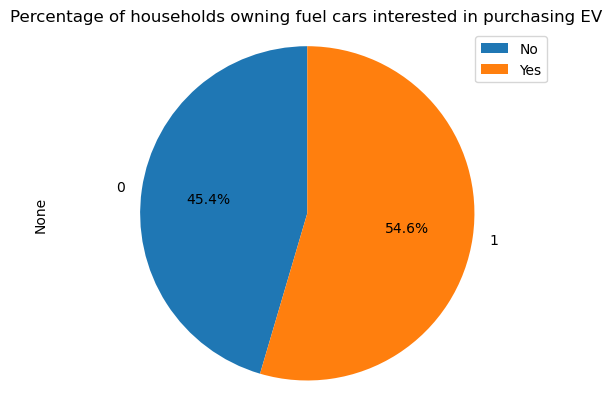

In [57]:
# Plot the pie chart
ev_interest.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage of households owning fuel cars interested in purchasing EV")
plt.legend(["No", "Yes"])
plt.show()

# 4. Feature engineering

In [58]:
# Create a combined feature from 'home_parking' and 'home_evse'
dataset['home_charging_facility'] = (dataset['home_parking'] + dataset['home_evse']) / 2

# Display the first few rows of the dataset to verify the new feature
dataset[['home_parking', 'home_evse', 'home_charging_facility']].head()


home_parking  home_evse  home_charging_facility
0             3          2                     2.5
1             3          2                     2.5
2             3          2                     2.5
3             3          2                     2.5
4             3          2                     2.5

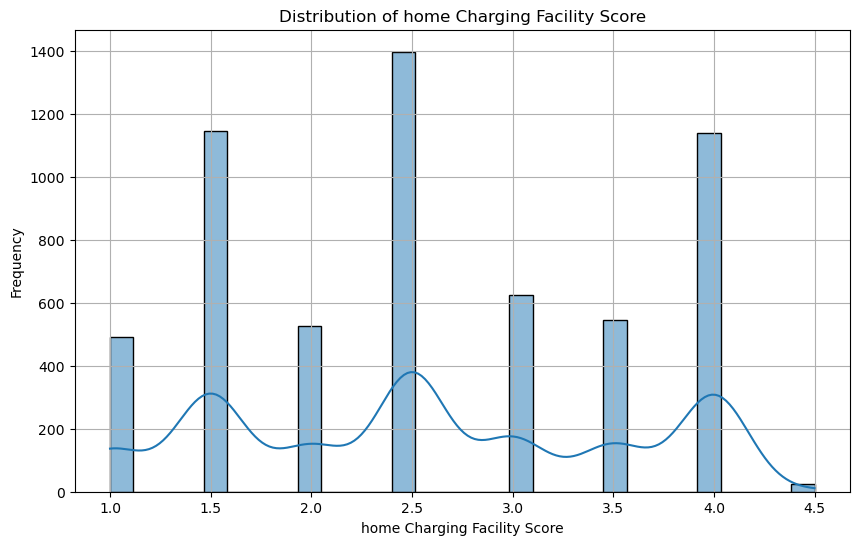

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the new combined feature 'work_charging_facility'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['home_charging_facility'], bins=30, kde=True)
plt.title('Distribution of home Charging Facility Score')
plt.xlabel('home Charging Facility Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [60]:
# Create a combined feature from 'work_parking' and 'work_evse'
dataset['work_charging_facility'] = (dataset['work_parking'] + dataset['work_evse']) / 2

# Display the first few rows of the dataset to verify the new feature
dataset[['work_parking', 'work_evse', 'work_charging_facility']].head()


work_parking  work_evse  work_charging_facility
0             5          2                     3.5
1             5          2                     3.5
2             5          2                     3.5
3             5          2                     3.5
4             5          2                     3.5

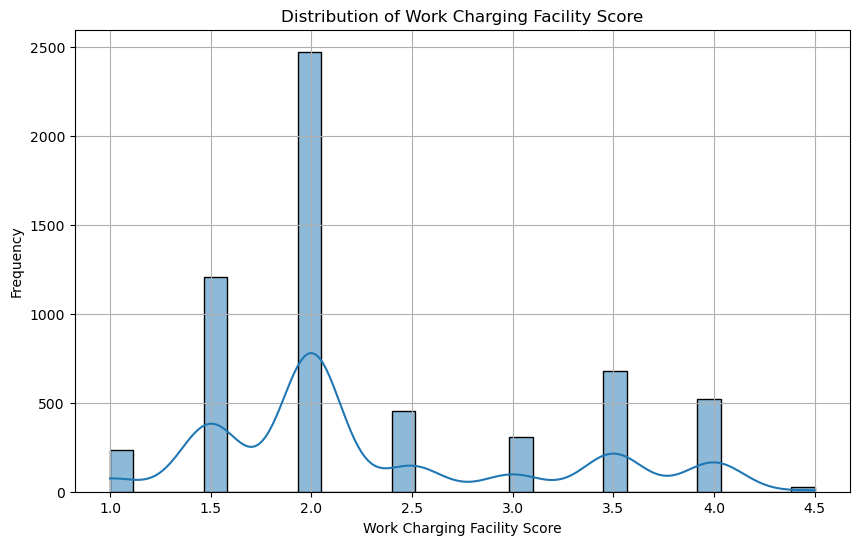

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the new combined feature 'work_charging_facility'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['work_charging_facility'], bins=30, kde=True)
plt.title('Distribution of Work Charging Facility Score')
plt.xlabel('Work Charging Facility Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

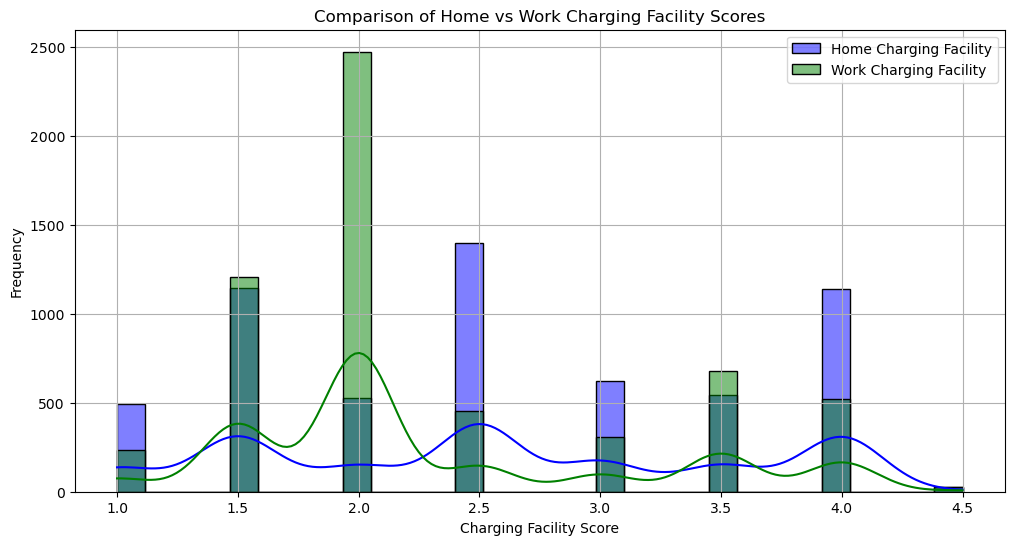

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['home_charging_facility'], bins=30, kde=True, color='blue', label='Home Charging Facility')
sns.histplot(dataset['work_charging_facility'], bins=30, kde=True, color='green', label='Work Charging Facility')
plt.title('Comparison of Home vs Work Charging Facility Scores')
plt.xlabel('Charging Facility Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
